In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df_ger = pd.read_csv('Data/Global.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

Country ISO 3166-1 alpha-3         Total          Coal           Oil  \
Year                                                                        
1980  Global                WLD  19501.263339   7024.128811   8951.775558   
1981  Global                WLD  19036.118109   7004.883319   8550.304967   
1982  Global                WLD  18884.487014   7126.512351   8345.175954   
1983  Global                WLD  19006.539624   7314.190173   8260.815187   
1984  Global                WLD  19664.753809   7668.797447   8328.840383   
1985  Global                WLD  20325.486795   8217.823510   8326.771194   
1986  Global                WLD  20627.358491   8335.814386   8576.333790   
1987  Global                WLD  21273.904184   8617.360981   8654.658723   
1988  Global                WLD  22107.794982   8910.819131   8972.672132   
1989  Global                WLD  22410.401527   8909.615731   9130.079809   
1990  Global                WLD  22757.480501   8688.659628   9249.362779   
1991  Global                WLD  23244.805747   8604.035333   9723.429325   
1992  Global                WLD  22580.023401   8399.006350   9226.138958   
1993  Global                WLD  22812.899822   8500.946752   9232.772870   
1994  Global                WLD  22969.498357   8548.628481   9265.657084   
1995  Global                WLD  23458.713064   8793.982796   9363.845279   
1996  Global                WLD  24159.382272   9015.793678   9643.208497   
1997  Global                WLD  24302.583028   8967.539839   9786.860718   
1998  Global                WLD  24213.260513   8725.984770   9883.466872   
1999  Global                WLD  24732.388369   8855.187209  10112.427162   
2000  Global                WLD  25453.622139   9203.117603  10302.090594   
2001  Global                WLD  25668.048326   9255.256797  10390.668975   
2002  Global                WLD  26281.037468   9678.959137  10385.864180   
2003  Global                WLD  27651.596453  10518.463642  10679.654448   
2004  Global                WLD  28636.695037  10871.584335  11042.504634   
2005  Global                WLD  29614.602256  11543.334878  11139.399176   
2006  Global                WLD  30593.116788  12188.840276  11246.321550   
2007  Global                WLD  31506.789200  12776.360246  11283.665343   
2008  Global                WLD  32085.836322  13192.796643  11251.325081   
2009  Global                WLD  31564.030692  13016.427997  10996.948677   
2010  Global                WLD  33364.346496  13926.620921  11359.882721   
2011  Global                WLD  34487.011618  14737.125795  11388.085507   
2012  Global                WLD  35006.267581  14922.759403  11541.707139   
2013  Global                WLD  35319.201624  15024.486027  11626.445964   
2014  Global                WLD  35577.534774  15051.512770  11678.782147   
2015  Global                WLD  35558.565735  14710.087469  11929.665762   
2016  Global                WLD  35524.193212  14360.605245  12023.833280   
2017  Global                WLD  36096.739276  14506.973805  12242.627935   
2018  Global                WLD  36826.506600  14746.830688  12266.016285   
2019  Global                WLD  37082.558969  14725.978025  12345.653374   
2020  Global                WLD  35264.085734  14174.564010  11191.808551   
2021  Global                WLD  37123.850352  14979.598083  11837.159116   

              Gas  
Year               
1980  2758.101427  
1981  2794.346721  
1982  2731.273279  
1983  2760.541893  
1984  3010.425483  
1985  3121.400874  
1986  3045.544194  
1987  3305.280002  
1988  3466.022378  
1989  3639.817109  
1990  3833.133407  
1991  3909.677268  
1992  3958.119661  
1993  4067.061088  
1994  4102.083232  
1995  4209.967591  
1996  4395.991935  
1997  4412.477760  
1998  4484.475325  
1999  4621.802576  
2000  4731.291034  
2001  4773.584851  
2002  4905.853640  
2003  5081.468111  
2004  5257.190057  
2005  5380.665522  
2006  5506.809201  
2007  5694.133805  
2008  5864.29123

In [3]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

Total          Coal           Oil          Gas
Year                                                       
1980  19501.263339   7024.128811   8951.775558  2758.101427
1981  19036.118109   7004.883319   8550.304967  2794.346721
1982  18884.487014   7126.512351   8345.175954  2731.273279
1983  19006.539624   7314.190173   8260.815187  2760.541893
1984  19664.753809   7668.797447   8328.840383  3010.425483
1985  20325.486795   8217.823510   8326.771194  3121.400874
1986  20627.358491   8335.814386   8576.333790  3045.544194
1987  21273.904184   8617.360981   8654.658723  3305.280002
1988  22107.794982   8910.819131   8972.672132  3466.022378
1989  22410.401527   8909.615731   9130.079809  3639.817109
1990  22757.480501   8688.659628   9249.362779  3833.133407
1991  23244.805747   8604.035333   9723.429325  3909.677268
1992  22580.023401   8399.006350   9226.138958  3958.119661
1993  22812.899822   8500.946752   9232.772870  4067.061088
1994  22969.498357   8548.628481   9265.657084  4102.083232
1995  23458.713064   8793.982796   9363.845279  4209.967591
1996  24159.382272   9015.793678   9643.208497  4395.991935
1997  24302.583028   8967.539839   9786.860718  4412.477760
1998  24213.260513   8725.984770   9883.466872  4484.475325
1999  24732.388369   8855.187209  10112.427162  4621.802576
2000  25453.622139   9203.117603  10302.090594  4731.291034
2001  25668.048326   9255.256797  10390.668975  4773.584851
2002  26281.037468   9678.959137  10385.864180  4905.853640
2003  27651.596453  10518.463642  10679.654448  5081.468111
2004  28636.695037  10871.584335  11042.504634  5257.190057
2005  29614.602256  11543.334878  11139.399176  5380.665522
2006  30593.116788  12188.840276  11246.321550  5506.809201
2007  31506.789200  12776.360246  11283.665343  5694.133805
2008  32085.836322  13192.796643  11251.325081  5864.291234
2009  31564.030692  13016.427997  10996.948677  5751.954007
2010  33364.346496  13926.620921  11359.882721  6195.343757
2011  34487.011618  14737.125795  11388.085507  6366.902202
2012  35006.267581  14922.759403  11541.707139  6500.593776
2013  35319.201624  15024.486027  11626.445964  6542.527061
2014  35577.534774  15051.512770  11678.782147  6654.555376
2015  35558.565735  14710.087469  11929.665762  6788.073864
2016  35524.193212  14360.605245  12023.833280  6973.648992
2017  36096.739276  14506.973805  12242.627935  7144.928128
2018  36826.506600  14746.830688  12266.016285  7529.846784
2019  37082.558969  14725.978025  12345.653374  7647.528220
2020  35264.085734  14174.564010  11191.808551  7556.290283
2021  37123.850352  14979.598083  11837.159116  7921.829472

In [4]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

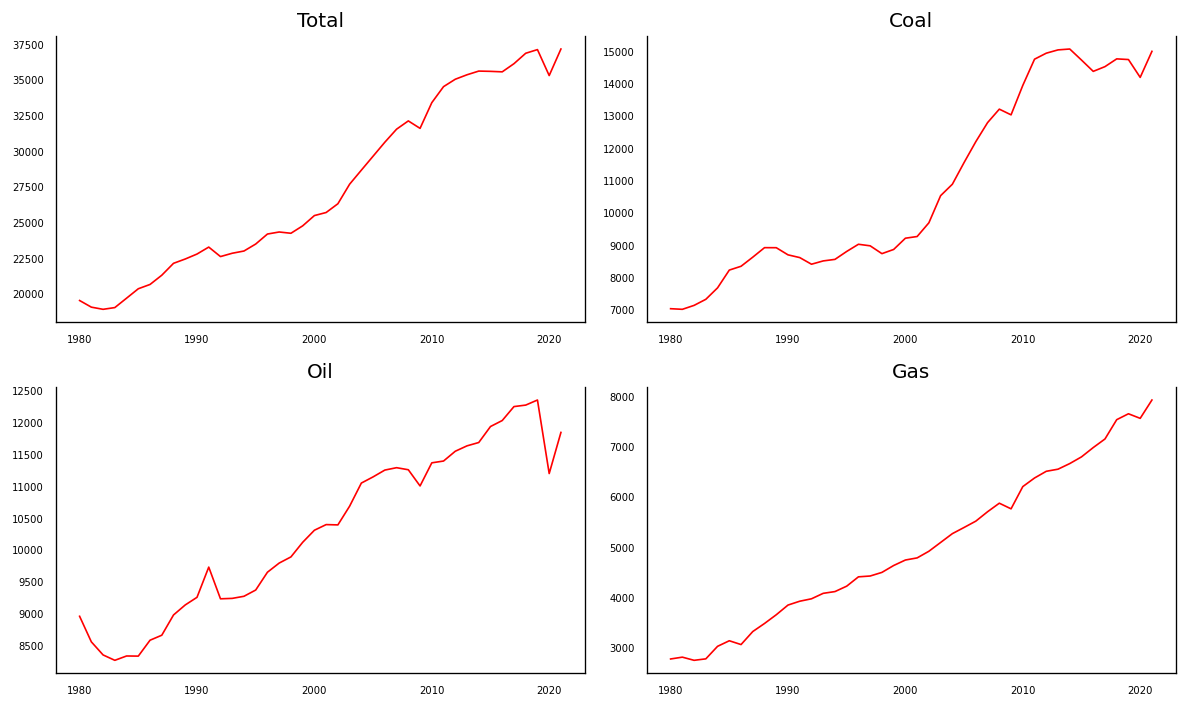

In [5]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

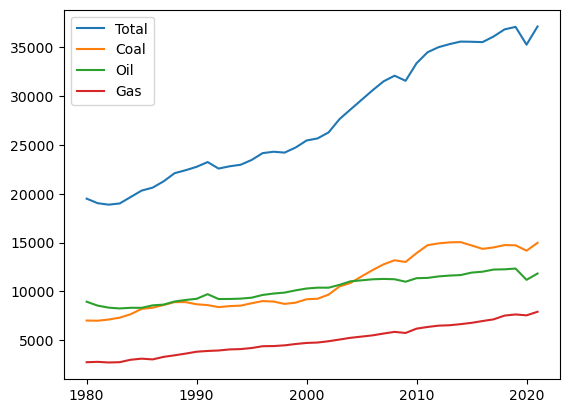

In [6]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

Total_x  Coal_x   Oil_x  Gas_x
Total_y   1.0000     0.0  0.0000    0.0
Coal_y    0.0000     1.0  0.0000    0.0
Oil_y     0.0000     0.0  1.0000    0.0
Gas_y     0.0002     0.0  0.3602    1.0

 Cointegration Test

In [8]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  78.02     > 40.1749   =>   True
Coal   ::  36.14     > 24.2761   =>   True
Oil    ::  11.91     > 12.3212   =>   False
Gas    ::  3.75      > 4.1296    =>   False


Split the Series into Training and Testing Data

In [9]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [10]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [11]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.958
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.9938. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7402
 No. Lags Chosen       = 1
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.836. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

In [12]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [13]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.612
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1746
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0215. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

How to Select the Order (P) of VAR model

In [14]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  38.814268789709516
BIC :  39.7030391105606
FPE :  7.248383284476038e+16
HQIC:  39.12107217948611 

Lag Order = 2
AIC :  38.78525023365922
BIC :  40.4013966714881
FPE :  7.356165831784085e+16
HQIC:  39.33640245390937 

Lag Order = 3
AIC :  39.01435947205898
BIC :  41.37249259921828
FPE :  1.051832868435115e+17
HQIC:  39.80779952045493 

Lag Order = 4
AIC :  38.96617548784126
BIC :  42.08086428129068
FPE :  1.3597614704305638e+17
HQIC:  39.998606703214115 

Lag Order = 5
AIC :  38.640896701368064
BIC :  42.526539449005234
FPE :  1.9585997097444666e+17
HQIC:  39.907519349935896 

Lag Order = 6
AIC :  34.60398989307008
BIC :  39.27464783194393
FPE :  1.9888226484199908e+16
HQIC:  36.09817349774703 

Lag Order = 7
AIC :  -inf
BIC :  -inf
FPE :  inf
HQIC:  -inf 

Lag Order = 8
AIC :  -207.2957930996861
BIC :  -201.01540040886013
FPE :  1.672028647458954e-90
HQIC:  -205.37581444231063 

Lag Order = 9
AIC :  -210.3361560320386
BIC :  -203.23305024801485
FPE :  1.3053701167

/Users/danilogiarlini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [15]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [16]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Mar, 2023
Time:                     10:26:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    40.4014
Nobs:                     34.0000    HQIC:                   39.3364
Log likelihood:          -816.325    FPE:                7.35617e+16
AIC:                      38.7853    Det(Omega_mle):     2.87537e+16
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const          667.600110       160.068116            4.171           0.000
L1.Total         2.009831         1.541124            1.304           0.192
L1.Coal         -1.441990         1.624293           -0.888           0.375
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [17]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 2.01
Coal   : 2.0
Oil    : 2.2
Gas    : 2.15


How to Forecast VAR model using statsmodels

In [18]:
df_differenced

Total        Coal         Oil         Gas
Year                                                 
1981  -465.145230  -19.245492 -401.470591   36.245294
1982  -151.631095  121.629032 -205.129013  -63.073442
1983   122.052610  187.677822  -84.360767   29.268614
1984   658.214185  354.607274   68.025196  249.883590
1985   660.732986  549.026063   -2.069189  110.975391
1986   301.871696  117.990876  249.562596  -75.856680
1987   646.545693  281.546595   78.324933  259.735808
1988   833.890798  293.458150  318.013409  160.742376
1989   302.606545   -1.203400  157.407677  173.794731
1990   347.078974 -220.956103  119.282970  193.316298
1991   487.325246  -84.624295  474.066546   76.543861
1992  -664.782346 -205.028983 -497.290367   48.442393
1993   232.876421  101.940402    6.633912  108.941427
1994   156.598535   47.681729   32.884214   35.022144
1995   489.214707  245.354315   98.188195  107.884359
1996   700.669208  221.810882  279.363218  186.024344
1997   143.200756  -48.253839  143.652221   16.485825
1998   -89.322515 -241.555069   96.606154   71.997565
1999   519.127856  129.202439  228.960290  137.327251
2000   721.233770  347.930394  189.663432  109.488458
2001   214.426187   52.139194   88.578381   42.293817
2002   612.989142  423.702340   -4.804795  132.268789
2003  1370.558985  839.504505  293.790268  175.614471
2004   985.098584  353.120693  362.850186  175.721946
2005   977.907219  671.750543   96.894542  123.475465
2006   978.514532  645.505398  106.922374  126.143679
2007   913.672412  587.519970   37.343793  187.324604
2008   579.047122  416.436397  -32.340262  170.157429
2009  -521.805630 -176.368646 -254.376404 -112.337227
2010  1800.315804  910.192924  362.934044  443.389750
2011  1122.665122  810.504874   28.202786  171.558445
2012   519.255963  185.633608  153.621632  133.691574
2013   312.934043  101.726624   84.738825   41.933285
2014   258.333150   27.026743   52.336183  112.028315
2015   -18.969039 -341.425301  250.883615  133.518488
2016   -34.372523 -349.482224   94.167518  185.575128

In [19]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

2


array([[ -18.969039, -341.425301,  250.883615,  133.518488],
       [ -34.372523, -349.482224,   94.167518,  185.575128]])

In [20]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

Total_2d     Coal_2d      Oil_2d      Gas_2d
Year                                                
2017  105.056320 -312.145845  335.475000   48.677732
2018 -165.037120 -333.854821   89.958974   73.048504
2019  230.958406  -85.755183  149.650163  134.573472
2020  215.268083  -47.981228  151.635394   88.052062
2021  197.115857  -42.726504  110.723514   99.867220

Invert the transformation to get the real forecast

In [21]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [22]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

Total_forecast  Coal_forecast  Oil_forecast  Gas_forecast
Year                                                           
2017    35594.877009   13698.977176  12453.475798   7207.901852
2018    35500.523686   12703.494286  12973.077289   7515.203215
2019    35637.128769   11622.256213  13642.328944   7957.078051
2020    35989.001936   10493.036912  14463.215993   8487.004949
2021    36537.990958    9321.091108  15394.826555   9116.799067

In [23]:
df_test

Total          Coal           Oil          Gas
Year                                                       
2017  36096.739276  14506.973805  12242.627935  7144.928128
2018  36826.506600  14746.830688  12266.016285  7529.846784
2019  37082.558969  14725.978025  12345.653374  7647.528220
2020  35264.085734  14174.564010  11191.808551  7556.290283
2021  37123.850352  14979.598083  11837.159116  7921.829472

Plot of Forecast vs Actuals

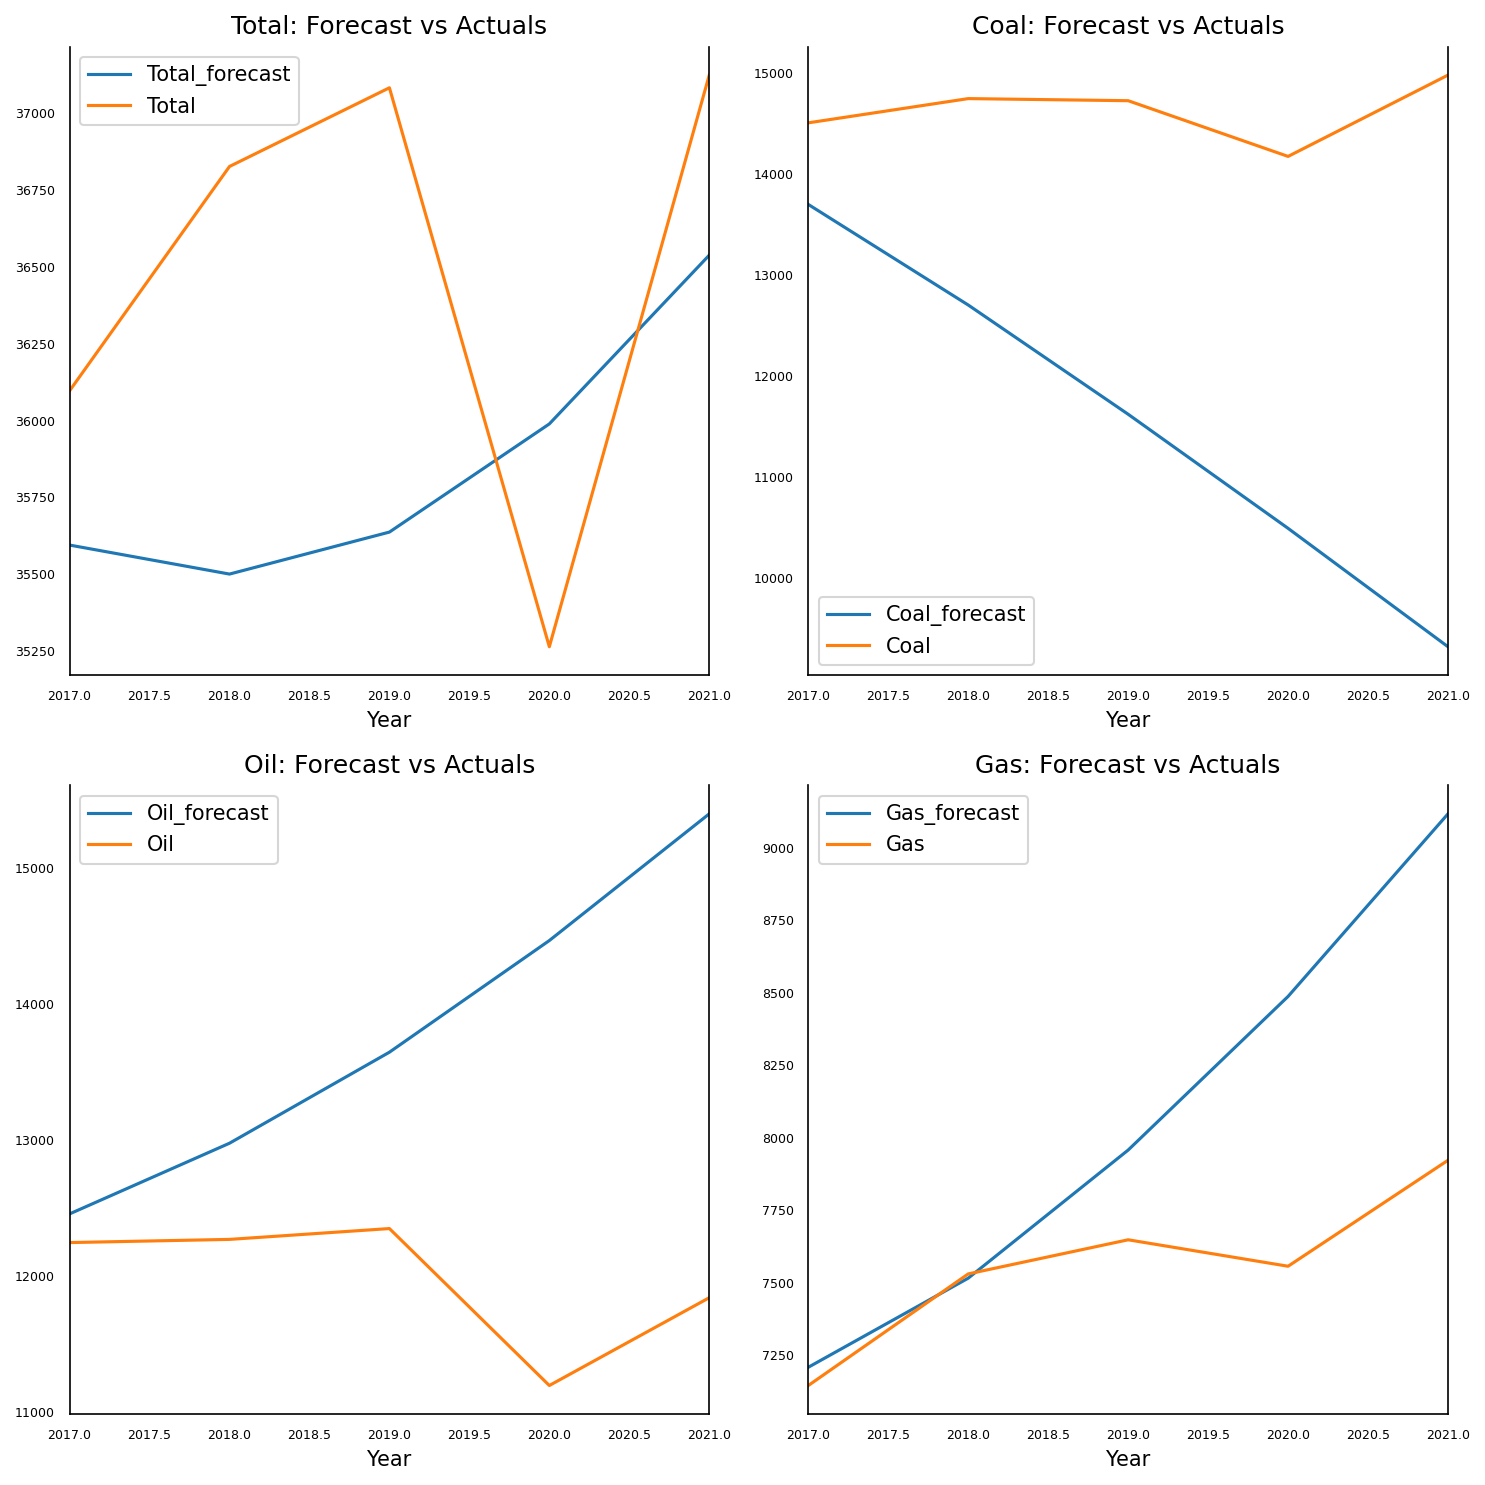

In [24]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [25]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.025
me     :  -626.8437
mae    :  916.8102
mpe    :  -0.0168
rmse   :  996.8049
corr   :  0.0905
minmax :  0.025

Forecast Accuracy of: Coal
mape   :  0.2085
me     :  -3059.0178
mae    :  3059.0178
mpe    :  -0.2085
rmse   :  3465.069
corr   :  -0.1998
minmax :  0.2085

Forecast Accuracy of: Oil
mape   :  0.1546
me     :  1808.7319
mae    :  1808.7319
mpe    :  0.1546
rmse   :  2262.0727
corr   :  -0.6195
minmax :  0.1248

Forecast Accuracy of: Gas
mape   :  0.0651
me     :  496.7128
mae    :  502.5703
mpe    :  0.0643
rmse   :  691.9803
corr   :  0.87
minmax :  0.0581


Forecasting the future: for 2 years (since p=2)

In [26]:
df_differenced_all = df.diff().dropna()

In [27]:
df_differenced_all

Total        Coal          Oil         Gas
Year                                                  
1981  -465.145230  -19.245492  -401.470591   36.245294
1982  -151.631095  121.629032  -205.129013  -63.073442
1983   122.052610  187.677822   -84.360767   29.268614
1984   658.214185  354.607274    68.025196  249.883590
1985   660.732986  549.026063    -2.069189  110.975391
1986   301.871696  117.990876   249.562596  -75.856680
1987   646.545693  281.546595    78.324933  259.735808
1988   833.890798  293.458150   318.013409  160.742376
1989   302.606545   -1.203400   157.407677  173.794731
1990   347.078974 -220.956103   119.282970  193.316298
1991   487.325246  -84.624295   474.066546   76.543861
1992  -664.782346 -205.028983  -497.290367   48.442393
1993   232.876421  101.940402     6.633912  108.941427
1994   156.598535   47.681729    32.884214   35.022144
1995   489.214707  245.354315    98.188195  107.884359
1996   700.669208  221.810882   279.363218  186.024344
1997   143.200756  -48.253839   143.652221   16.485825
1998   -89.322515 -241.555069    96.606154   71.997565
1999   519.127856  129.202439   228.960290  137.327251
2000   721.233770  347.930394   189.663432  109.488458
2001   214.426187   52.139194    88.578381   42.293817
2002   612.989142  423.702340    -4.804795  132.268789
2003  1370.558985  839.504505   293.790268  175.614471
2004   985.098584  353.120693   362.850186  175.721946
2005   977.907219  671.750543    96.894542  123.475465
2006   978.514532  645.505398   106.922374  126.143679
2007   913.672412  587.519970    37.343793  187.324604
2008   579.047122  416.436397   -32.340262  170.157429
2009  -521.805630 -176.368646  -254.376404 -112.337227
2010  1800.315804  910.192924   362.934044  443.389750
2011  1122.665122  810.504874    28.202786  171.558445
2012   519.255963  185.633608   153.621632  133.691574
2013   312.934043  101.726624    84.738825   41.933285
2014   258.333150   27.026743    52.336183  112.028315
2015   -18.969039 -341.425301   250.883615  133.518488
2016   -34.372523 -349.482224    94.167518  185.575128
2017   572.546064  146.368560   218.794655  171.279136
2018   729.767324  239.856883    23.388350  384.918656
2019   256.052369  -20.852663    79.637089  117.681436
2020 -1818.473235 -551.414015 -1153.844823  -91.237937
2021  1859.764618  805.034073   645.350565  365.539189

In [28]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[-1818.473235,  -551.414015, -1153.844823,   -91.237937],
       [ 1859.764618,   805.034073,   645.350565,   365.539189]])

In [29]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

/Users/danilogiarlini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Mar, 2023
Time:                     10:26:28
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    41.3041
Nobs:                     39.0000    HQIC:                   40.3195
Log likelihood:          -960.841    FPE:                1.93182e+17
AIC:                      39.7686    Det(Omega_mle):     8.41901e+16
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const          827.489231       184.051983            4.496           0.000
L1.Total         1.662419         1.915532            0.868           0.385
L1.Coal         -1.037625         2.010561           -0.516           0.606
L1.O

In [30]:
# Forecast

l = df_differenced_all.last_valid_index() # gives the index of the last row in df_differenced_all
s = 10 # steps to future
fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=s) 
df_forecast_all = pd.DataFrame(fc_all, index=list(range(l+1,l+s+1)), columns=df.columns + '_2d')
df_forecast_all

Total_2d     Coal_2d      Oil_2d      Gas_2d
2022 -312.178112  135.037423 -435.747648   -2.085308
2023  741.293311  251.017003  258.241933  155.497686
2024  401.624265  248.268688   31.810211  106.044451
2025  511.451274  226.789775   82.264573  144.927251
2026  550.300004  241.983225  136.690242  127.423781
2027  355.583337  164.012078   26.634108  121.228376
2028  531.719959  220.812558  123.136329  139.967660
2029  383.795580  177.300792   43.833962  122.022184
2030  457.950476  192.344189   86.326083  133.244931
2031  421.127602  186.781076   66.182273  126.814375

In [31]:
# Tranforming the future forecast back
df_results_all = invert_transformation(df, df_forecast_all, second_diff=True) 
df_results_all = df_results_all.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

In [32]:
df_results_all

Total_forecast  Coal_forecast  Oil_forecast  Gas_forecast
2022    38671.436858   15919.669579  12046.762033   8285.283353
2023    40960.316675   17110.758077  12514.606883   8804.234919
2024    43650.820757   18550.115263  13014.261944   9429.230937
2025    46852.776113   20216.262225  13596.181578  10199.154207
2026    50605.031473   22124.392411  14314.791453  11096.501257
2027    54712.870170   24196.534675  15060.035436  12115.076684
2028    59352.428826   26489.489496  15928.415749  13273.619770
2029    64375.783063   28959.745110  16840.630023  14554.185040
2030    69857.087775   31622.344912  17839.170380  15967.995242
2031    75759.520090   34471.725791  18903.893010  17508.619818

In [33]:
# Concate the actual df with the forecasted df till 2031 (df_results_all)

df_results_all = df_results_all.rename(columns={"Total_forecast": "Total", "Coal_forecast": "Coal", "Oil_forecast": "Oil", "Gas_forecast": "Gas"})
# renaming the df_results_all columns to that of df

df_results_all

Total          Coal           Oil           Gas
2022  38671.436858  15919.669579  12046.762033   8285.283353
2023  40960.316675  17110.758077  12514.606883   8804.234919
2024  43650.820757  18550.115263  13014.261944   9429.230937
2025  46852.776113  20216.262225  13596.181578  10199.154207
2026  50605.031473  22124.392411  14314.791453  11096.501257
2027  54712.870170  24196.534675  15060.035436  12115.076684
2028  59352.428826  26489.489496  15928.415749  13273.619770
2029  64375.783063  28959.745110  16840.630023  14554.185040
2030  69857.087775  31622.344912  17839.170380  15967.995242
2031  75759.520090  34471.725791  18903.893010  17508.619818

In [34]:
# Concat syntax
df_future  = pd.concat([df, df_results_all], axis=0)
df_future

Total          Coal           Oil           Gas
1980  19501.263339   7024.128811   8951.775558   2758.101427
1981  19036.118109   7004.883319   8550.304967   2794.346721
1982  18884.487014   7126.512351   8345.175954   2731.273279
1983  19006.539624   7314.190173   8260.815187   2760.541893
1984  19664.753809   7668.797447   8328.840383   3010.425483
1985  20325.486795   8217.823510   8326.771194   3121.400874
1986  20627.358491   8335.814386   8576.333790   3045.544194
1987  21273.904184   8617.360981   8654.658723   3305.280002
1988  22107.794982   8910.819131   8972.672132   3466.022378
1989  22410.401527   8909.615731   9130.079809   3639.817109
1990  22757.480501   8688.659628   9249.362779   3833.133407
1991  23244.805747   8604.035333   9723.429325   3909.677268
1992  22580.023401   8399.006350   9226.138958   3958.119661
1993  22812.899822   8500.946752   9232.772870   4067.061088
1994  22969.498357   8548.628481   9265.657084   4102.083232
1995  23458.713064   8793.982796   9363.845279   4209.967591
1996  24159.382272   9015.793678   9643.208497   4395.991935
1997  24302.583028   8967.539839   9786.860718   4412.477760
1998  24213.260513   8725.984770   9883.466872   4484.475325
1999  24732.388369   8855.187209  10112.427162   4621.802576
2000  25453.622139   9203.117603  10302.090594   4731.291034
2001  25668.048326   9255.256797  10390.668975   4773.584851
2002  26281.037468   9678.959137  10385.864180   4905.853640
2003  27651.596453  10518.463642  10679.654448   5081.468111
2004  28636.695037  10871.584335  11042.504634   5257.190057
2005  29614.602256  11543.334878  11139.399176   5380.665522
2006  30593.116788  12188.840276  11246.321550   5506.809201
2007  31506.789200  12776.360246  11283.665343   5694.133805
2008  32085.836322  13192.796643  11251.325081   5864.291234
2009  31564.030692  13016.427997  10996.948677   5751.954007
2010  33364.346496  13926.620921  11359.882721   6195.343757
2011  34487.011618  14737.125795  11388.085507   6366.902202
2012  35006.267581  14922.759403  11541.707139   6500.593776
2013  35319.201624  15024.486027  11626.445964   6542.527061
2014  35577.534774  15051.512770  11678.782147   6654.555376
2015  35558.565735  14710.087469  11929.665762   6788.073864
2016  35524.193212  14360.605245  12023.833280   6973.648992
2017  36096.739276  14506.973805  12242.627935   7144.928128
2018  36826.506600  14746.830688  12266.016285   7529.846784
2019  37082.558969  14725.978025  12345.653374   7647.528220
2020  35264.085734  14174.564010  11191.808551   7556.290283
2021  37123.850352  14979.598083  11837.159116   7921.829472
2022  38671.436858  15919.669579  12046.762033   8285.283353
2023  40960.316675  17110.758077  12514.606883   8804.234919
2024  43650.820757  18550.115263  13014.261944   9429.230937
2025  46852.776113  20216.262225  13596.181578  10199.154207
2026  50605.031473  22124.392411  14314.791453  11096.501257
2027  54712.870170  24196.534675  15060.035436  12115.076684
2028  59352.428826  26489.489496  15928.415749  13273.619770
2029  64375.783063  28959.745110  16840.630023  14554.185040
2030  69857.087775  31622.344912  17839.170380  15967.995242
2031  75759.520090  34471.725791  18903.893010  17508.619818

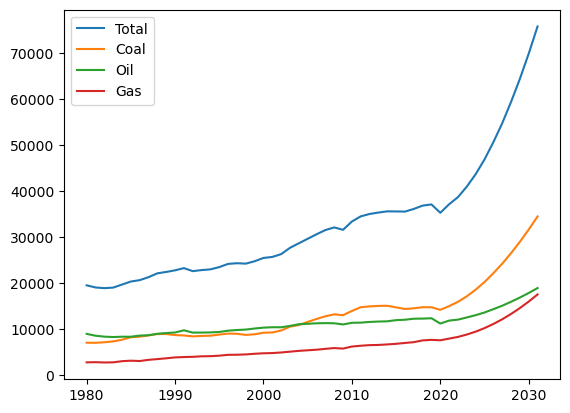

In [35]:
# Plot
plt.figure()

x = df_future.index
y1 = df_future['Total']
y2 = df_future['Coal']
y3 = df_future['Oil']
y4 = df_future['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

In [36]:
df_future["Year"]=df_future.index
df_future

Total          Coal           Oil           Gas  Year
1980  19501.263339   7024.128811   8951.775558   2758.101427  1980
1981  19036.118109   7004.883319   8550.304967   2794.346721  1981
1982  18884.487014   7126.512351   8345.175954   2731.273279  1982
1983  19006.539624   7314.190173   8260.815187   2760.541893  1983
1984  19664.753809   7668.797447   8328.840383   3010.425483  1984
1985  20325.486795   8217.823510   8326.771194   3121.400874  1985
1986  20627.358491   8335.814386   8576.333790   3045.544194  1986
1987  21273.904184   8617.360981   8654.658723   3305.280002  1987
1988  22107.794982   8910.819131   8972.672132   3466.022378  1988
1989  22410.401527   8909.615731   9130.079809   3639.817109  1989
1990  22757.480501   8688.659628   9249.362779   3833.133407  1990
1991  23244.805747   8604.035333   9723.429325   3909.677268  1991
1992  22580.023401   8399.006350   9226.138958   3958.119661  1992
1993  22812.899822   8500.946752   9232.772870   4067.061088  1993
1994  22969.498357   8548.628481   9265.657084   4102.083232  1994
1995  23458.713064   8793.982796   9363.845279   4209.967591  1995
1996  24159.382272   9015.793678   9643.208497   4395.991935  1996
1997  24302.583028   8967.539839   9786.860718   4412.477760  1997
1998  24213.260513   8725.984770   9883.466872   4484.475325  1998
1999  24732.388369   8855.187209  10112.427162   4621.802576  1999
2000  25453.622139   9203.117603  10302.090594   4731.291034  2000
2001  25668.048326   9255.256797  10390.668975   4773.584851  2001
2002  26281.037468   9678.959137  10385.864180   4905.853640  2002
2003  27651.596453  10518.463642  10679.654448   5081.468111  2003
2004  28636.695037  10871.584335  11042.504634   5257.190057  2004
2005  29614.602256  11543.334878  11139.399176   5380.665522  2005
2006  30593.116788  12188.840276  11246.321550   5506.809201  2006
2007  31506.789200  12776.360246  11283.665343   5694.133805  2007
2008  32085.836322  13192.796643  11251.325081   5864.291234  2008
2009  31564.030692  13016.427997  10996.948677   5751.954007  2009
2010  33364.346496  13926.620921  11359.882721   6195.343757  2010
2011  34487.011618  14737.125795  11388.085507   6366.902202  2011
2012  35006.267581  14922.759403  11541.707139   6500.593776  2012
2013  35319.201624  15024.486027  11626.445964   6542.527061  2013
2014  35577.534774  15051.512770  11678.782147   6654.555376  2014
2015  35558.565735  14710.087469  11929.665762   6788.073864  2015
2016  35524.193212  14360.605245  12023.833280   6973.648992  2016
2017  36096.739276  14506.973805  12242.627935   7144.928128  2017
2018  36826.506600  14746.830688  12266.016285   7529.846784  2018
2019  37082.558969  14725.978025  12345.653374   7647.528220  2019
2020  35264.085734  14174.564010  11191.808551   7556.290283  2020
2021  37123.850352  14979.598083  11837.159116   7921.829472  2021
2022  38671.436858  15919.669579  12046.762033   8285.283353  2022
2023  40960.316675  17110.758077  12514.606883   8804.234919  2023
2024  43650.820757  18550.115263  13014.261944   9429.230937  2024
2025  46852.776113  20216.262225  13596.181578  10199.154207  2025
2026  50605.031473  22124.392411  14314.791453  11096.501257  2026
2027  54712.870170  24196.534675  15060.035436  12115.076684  2027
2028  59352.428826  26489.489496  15928.415749  13273.619770  2028
2029  64375.783063  28959.745110  16840.630023  14554.185040  2029
2030  69857.087775  31622.344912  17839.170380  15967.995242  2030
2031  75759.520090  34471.725791  18903.893010  17508.619818  2031

In [39]:
# save to csv
df_future.to_csv('Data/Global_future.csv', index=False)